In [51]:
%run load-clean-select.ipynb

Morphology was measured for 610.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 610 cells.

The are no duplicated column names: True
Read biomarkers normalised by to min gain
Biomarkers were measured for 610 cells.

The are no duplicated column names: True

Full dataset has shape: (610, 484)
Initial shape is: (610, 484)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centerZ_nucl',
       'loc_maxintensityZ_dapi', 'centerZ_cyto',
       'loc_centermassintensityZ_ker', 'loc_centermassintensityZ_vim',
       'loc_centerZ', 'loc_maxintensityZ_ker', 'loc_maxinten

# Which dataset?

In [59]:
# The full dataset
# df = measurements
# Dataset without clusters at 64kPa
# df = measurements_red
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa
df = measurements_5
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa with balanced classes
# df = measurements_b

## Morphology

### Explore groups of features

In [ ]:
df_fs = df.loc[:, 'label' : 'well']
#feature_group = []

###### Cell Shape

In [ ]:
group = df.loc[:, 'area_cell' : 'solidity_cell']
print("Number of cell shape features:", group.shape[1])

In [ ]:
group.drop(['majoraxislength_cell', 'maxferetdiameter_cell', 
                 'maximumradius_cell', 'medianradius_cell', 
                 'minferetdiameter_cell'], axis=1, inplace=True)
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected {} cell shape features:".format(group.shape[1]))
#feature_group.extend([1] * group.shape[1])

###### Cell Zernike

In [ ]:
group = df.loc[:, 'zernike_0_0_cell' : 'zernike_9_9_cell']
print("Number of cell zernike features:", group.shape[1])

In [ ]:
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected {} cell zernike features:".format(group.shape[1]))
#feature_group.extend([1] * group.shape[1])

###### Cell Intensity

In [ ]:
group = df.loc[:, 'integratedintensityedge_wga_cell' : 'upperquartileintensity_wga_cell'] 
print("Number of cell intensity features:", group.shape[1])
plot_corr(group, annot=False)

In [ ]:
group.drop(['madintensity_wga_cell', 'medianintensity_wga_cell', 
            'upperquartileintensity_wga_cell', 'minintensityedge_wga_cell', 
            'stdintensityedge_wga_cell'], axis=1, inplace=True)
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected cell intensity features:", group.shape[1])
#feature_group.extend([2] * group.shape[1])

###### Cell Neighbours

In [ ]:
group = df.loc[:, 'anglebetweenneighbors_cell' : 'secondclosestdistance_cell']
print("Number of cell neighbours features:", group.shape[1])
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected cell neighbours features:", group.shape[1])
#feature_group.extend([3] * group.shape[1])

###### Cell Texture

In [ ]:
group = df.loc[:, 'angularsecondmoment_wga_00_cell' : 'variance_wga_03_cell']
print("Number of cell texture features:", group.shape[1])
plot_corr(group, annot=False)

In [ ]:
group = df[['angularsecondmoment_wga_00_cell', 'contrast_wga_00_cell', 
            'correlation_wga_01_cell', 'correlation_wga_02_cell',
            'differencevariance_wga_00_cell', 'entropy_wga_00_cell', 
            'infomeas1_wga_00_cell', 'infomeas1_wga_01_cell',
            'infomeas1_wga_02_cell', 'infomeas1_wga_03_cell',
            'infomeas2_wga_00_cell', 'sumaverage_wga_00_cell', 
            'variance_wga_00_cell']]
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected cell texture features:", group.shape[1])
#feature_group.extend([4] * group.shape[1])

###### Nuclear Shape

In [ ]:
group = df.loc[:,  'area_nucl' : 'solidity_nucl']
print("Number of nuclear shape features:", group.shape[1])

In [ ]:
group.drop(['maxferetdiameter_nucl', 'maximumradius_nucl', 
                 'medianradius_nucl', 'minferetdiameter_nucl', 
                 'minoraxislength_nucl', 'perimeter_nucl'], axis=1, inplace=True)
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected nuclear shape features:", group.shape[1])
#feature_group.extend([5] * group.shape[1])

###### Nuclear Zernike

In [ ]:
group = df.loc[:, 'zernike_0_0_nucl' : 'zernike_9_9_nucl']
print("Number of nuclear zernike features:", group.shape[1])
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected {} nuclear zernike features:".format(group.shape[1]))
#feature_group.extend([1] * group.shape[1])

###### Nuclear Intensity

In [ ]:
group = df.loc[:, 'integratedintensityedge_dapi' : 'upperquartileintensity_wga_nucl'] 

print("Number of nuclear intensity features:", group.shape[1])

In [ ]:
dapi_columns = [col for col in group.columns if 'dapi' in col]
wga_columns = [col for col in group.columns if 'wga' in col]

In [ ]:
plot_corr(group[wga_columns], annot=False)

In [ ]:
group.drop(['lowerquartileintensity_dapi', 'medianintensity_dapi', 
            'upperquartileintensity_dapi', 'minintensityedge_dapi', 
            'minintensity_dapi', 'stdintensityedge_dapi', 
            'integratedintensity_wga_nucl', 'meanintensityedge_wga_nucl', 
            'medianintensity_wga_nucl', 'maxintensityedge_wga_nucl',
            'lowerquartileintensity_wga_nucl', 'upperquartileintensity_wga_nucl', 
            'stdintensityedge_wga_nucl'],
              axis=1, inplace=True)
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Seleted nuclear intensity features:", group.shape[1])
#feature_group.extend([6] * group.shape[1])

###### Nuclei neighbours

In [ ]:
group = df.loc[:, 'anglebetweenneighbors_nucl' :'secondclosestdistance_nucl']
print("Number of nuclear neighbours features:", group.shape[1])

In [ ]:
group.drop(['percenttouching_nucl'], axis=1, inplace=True)


df_fs = pd.concat([df_fs, group], axis=1)

print("Seleted nuclear neighbours features:", group.shape[1])
#feature_group.extend([7] * group.shape[1])

###### Nuclear Texture

In [ ]:
group = df.loc[:, 'angularsecondmoment_dapi_00' : 'variance_wga_03_nucl']
print("Number of nuclear texture features:", group.shape[1])

In [ ]:
dapi_columns = [col for col in group.columns if 'dapi' in col]
wga_columns = [col for col in group.columns if 'wga' in col]

In [ ]:
plot_corr(group[wga_columns], annot=False)

In [ ]:
group = df[['angularsecondmoment_dapi_00',
            'contrast_dapi_00', 'contrast_dapi_02',
            'correlation_dapi_00', 'correlation_dapi_01', 
            'correlation_dapi_02', 'correlation_dapi_03', 
            'differenceentropy_dapi_00', 'differencevariance_dapi_00',
            'entropy_dapi_00', 'infomeas1_dapi_00', 
            'infomeas2_dapi_00', 'sumaverage_dapi_00', 
            'variance_dapi_00', 
            'angularsecondmoment_wga_00_nucl', 'contrast_wga_00_nucl', 
            'correlation_wga_00_nucl', 'correlation_wga_01_nucl', 
            'correlation_wga_02_nucl', 'correlation_wga_03_nucl', 
            'entropy_wga_00_nucl', 'infomeas1_wga_00_nucl', 
            'infomeas2_wga_00_nucl', 'sumaverage_wga_00_nucl', 'variance_wga_00_nucl']]
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Seleted nuclear texture features:", group.shape[1])
# feature_group.extend([8] * group.shape[1])

###### Distances

In [ ]:
group = df.loc[:, 'fartherstpoint_cell' : ]

print("Number of distance measurement features:", group.shape[1])
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Seleted distance measurement features:", group.shape[1])
# feature_group.extend([9] * group.shape[1])

###### Cytoplasm shape

In [ ]:
group = df.loc[:, 'area_cyto' : 'solidity_cyto']
print("Number of cell shape features:", group.shape[1])

In [ ]:
group.drop(['maxferetdiameter_cyto', 'maximumradius_cyto', 'medianradius_cyto', 'minferetdiameter_cyto'],
           axis=1, inplace=True)
plot_corr(group, annot=False)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected {} cytoplasm shape features:".format(group.shape[1]))
#feature_group.extend([1] * group.shape[1])

###### Cytoplasm zernike

In [ ]:
group = df.loc[:, 'zernike_0_0_cyto' : 'zernike_9_9_cyto']
print("Number of cell shape features:", group.shape[1])

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected {} cytoplasm zernike features:".format(group.shape[1]))
#feature_group.extend([1] * group.shape[1])

###### Check correlations

In [ ]:
plot_corr(df_fs, annot=False)

In [ ]:
df_fs.shape

## Biomarkers

### Explore groups of features

In [ ]:
df_fs = df.loc[:, 'label' : 'well']

###### Biomarker Intensity

In [ ]:
group = df.loc[:, 'integratedintensityedge_ker' : 'upperquartileintensity_vim'] 
print("Number of biom intensity features:", group.shape[1])

In [ ]:
ker_cols = [col for col in group.columns if 'ker' in col]
vim_cols = [col for col in group.columns if 'vim' in col]

In [ ]:
group.drop(['upperquartileintensity_ker', 'medianintensity_ker', 
            'minintensityedge_ker', 'madintensity_ker',
            'madintensity_vim', 'stdintensityedge_vim', 
            'upperquartileintensity_vim', 'minintensityedge_vim'], 
           axis=1, inplace=True)

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected cell intensity features:", group.shape[1])
#feature_group.extend([2] * group.shape[1])

###### Biomarker Texture

In [ ]:
group = df.loc[:, 'angularsecondmoment_ker_00' : 'variance_vim_03']
print("Number of cell texture features:", group.shape[1])

In [ ]:
ker_cols = [col for col in group.columns if 'ker' in col]
vim_cols = [col for col in group.columns if 'vim' in col]

In [ ]:
group = df[['angularsecondmoment_ker_00', 
            'contrast_ker_00', 'contrast_ker_01', 
            'contrast_ker_03', 
            'correlation_ker_00', 'correlation_ker_01', 
            'correlation_ker_02', 'correlation_ker_03', 
            'differencevariance_ker_00', 
            'entropy_ker_00', 
            'infomeas1_ker_00', 'infomeas1_ker_01',
            'infomeas1_ker_02', 'infomeas1_ker_03', 
            'infomeas2_ker_00', 'sumaverage_ker_00', 
            'variance_ker_00', 
            'angularsecondmoment_vim_00', 
            'contrast_vim_00', 'contrast_vim_02', 
            'correlation_vim_00', 'correlation_vim_01', 
            'correlation_vim_02', 'correlation_vim_03', 
            'differencevariance_vim_00', 
            'entropy_vim_00', 
            'infomeas1_vim_00', 'infomeas1_vim_01', 
            'infomeas1_vim_02', 'infomeas1_vim_03', 
            'infomeas2_vim_00', 'infomeas2_vim_02', 
            'sumaverage_vim_00']]

In [ ]:
df_fs = pd.concat([df_fs, group], axis=1)

print("Selected cell texture features:", group.shape[1])
#feature_group.extend([4] * group.shape[1])

In [ ]:
df_fs.shape

In [ ]:
plot_corr(df_fs, annot=False)

## Intergroup correlation

In [ ]:
plot_corr(df_fs, annot=False)

In [ ]:
p_corr = df_fs.corr()
[col for col in p_corr.columns if (p_corr[col] >= 0.9).sum() > 1]

In [ ]:
p_corr[p_corr.zernike_9_9_cell >= 0.9]

In [ ]:
df_fs.drop(['area_cyto', 'compactness_cyto',
            'eccentricity_cyto', 'extent_cyto',
            'minoraxislength_cyto', 'orientation_cyto',
            'perimeter_cyto', 'zernike_2_2_cyto',
            'zernike_3_cyto', 'zernike_4_4_cyto',
            'zernike_5_5_cyto', 'zernike_6_6_cyto',
            'zernike_7_5_cyto', 'zernike_7_7_cyto',
            'zernike_8_6_cyto', 'zernike_8_8_cyto',
            'zernike_9_7_cyto', 'zernike_9_9_cyto'], 
           axis=1, inplace=True)

In [ ]:
df_fs.drop(['zernike_0_0_cell'], axis=1, inplace=True)

In [ ]:
df_fs.drop(['sumaverage_wga_00_cell',
            'maxintensity_wga_nucl',
            'stdintensity_wga_cell',
            'sumaverage_dapi_00',
            'variance_dapi_00', 
            'sumaverage_wga_00_nucl', 
            'variance_wga_00_nucl'], 
            axis=1, inplace=True)

In [ ]:
df_fs.drop(['sumaverage_ker_00',
            'sumaverage_vim_00', 
            'variance_ker_00'], 
           axis=1, inplace=True)

In [ ]:
df_fs.shape

In [ ]:
def drop_corr_features(df, zernike=False, biomarkers=False):
    """
    Drop manually selected features with 
    Pearson's correlation coefficcient greater or equal than 90%.
    """
    
    print("Initial shape:", df.shape)
    print("Drop features with Pearson's correlation coefficient >= 90%.\n")
    
    # Create a new dataframe
    df_fs = df.loc[:, 'label' : 'well']
    
    # Morphology
    # Cell area
    group = df.loc[:, 'area_cell' : 'solidity_cell']
    group.drop(['majoraxislength_cell', 'maxferetdiameter_cell', 
                 'maximumradius_cell', 'medianradius_cell', 
                 'minferetdiameter_cell'], axis=1, inplace=True)
    print("Selected {} cell shape features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)
    
    # Cell Zernike
    if zernike:
        group = df.loc[:, 'zernike_0_0_cell' : 'zernike_9_9_cell']
        group.drop(['zernike_0_0_cell'], axis=1, inplace=True)
        print("Selected {} cell zernike features:".format(group.shape[1]))
        df_fs = pd.concat([df_fs, group], axis=1)
        
    # Cell intensity
    group = df.loc[:, 'integratedintensityedge_wga_cell' : 'upperquartileintensity_wga_cell'] 
    group.drop(['medianintensity_wga_cell', 'upperquartileintensity_wga_cell', 
                     'maxintensityedge_wga_cell', 'minintensity_wga_cell'], axis=1, inplace=True)
    print("Selected {} cell intensity features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)
    
    # Cell neighbours
    group = df.loc[:, 'anglebetweenneighbors_cell' : 'secondclosestdistance_cell']
    print("Selected {} cell neighbours features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)

    # Cell texture
    group = df.loc[:, 'angularsecondmoment_wga_00_cell' : 'variance_wga_03_cell']
    group = df[['angularsecondmoment_wga_00_cell', 'contrast_wga_00_cell', 
                         'correlation_wga_01_cell', 'correlation_wga_02_cell',
                         'differencevariance_wga_00_cell', 'entropy_wga_00_cell', 
                         'infomeas1_wga_00_cell', 'infomeas1_wga_02_cell', 
                         'infomeas2_wga_00_cell', 'sumaverage_wga_00_cell', 
                         'variance_wga_00_cell']]
    print("Selected {} cell texture features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)

    # Nuclear shape
    group = df.loc[:,  'area_nucl' : 'solidity_nucl']
    group.drop(['maxferetdiameter_nucl', 'maximumradius_nucl', 
                 'medianradius_nucl', 'minferetdiameter_nucl', 
                 'minoraxislength_nucl', 'perimeter_nucl'], axis=1, inplace=True)
    print("Selected {} nuclear shape features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)
    
    # Nuclear Zernike 
    if zernike:
        group = df.loc[:, 'zernike_0_0_nucl' : 'zernike_9_9_nucl']
        print("Selected {} nuclear zernike features.".format(group.shape[1]))
        df_fs = pd.concat([df_fs, group], axis=1)
        
    # Nuclear intensity
    group = df.loc[:, 'integratedintensityedge_dapi' : 'upperquartileintensity_wga_nucl'] 
    group.drop(['lowerquartileintensity_dapi', 'medianintensity_dapi', 
               'upperquartileintensity_dapi', 'minintensityedge_dapi', 
               'minintensity_dapi', 
               'lowerquartileintensity_wga_nucl', 'medianintensity_wga_nucl', 
               'upperquartileintensity_wga_nucl', 'maxintensityedge_wga_nucl', 
               'meanintensityedge_wga_nucl'],
              axis=1, inplace=True)
    print("Seleted {} nuclear intensity features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)

    # Nuclear neighbours
    group = df.loc[:, 'anglebetweenneighbors_nucl' :'secondclosestdistance_nucl']
    group.drop(['percenttouching_nucl'], axis=1, inplace=True)
    print("Seleted {} nuclear neighbours features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)

    # Nuclear texture
    group = df.loc[:, 'angularsecondmoment_dapi_00' : 'variance_wga_03_nucl']
    group = df[['angularsecondmoment_dapi_00',
                         'contrast_dapi_00', 'contrast_dapi_01', 
                         'contrast_dapi_02',
                         'correlation_dapi_00', 'correlation_dapi_01', 
                         'correlation_dapi_02', 'correlation_dapi_03', 
                         'differenceentropy_dapi_00', 'differencevariance_dapi_00',
                         'entropy_dapi_00', 'infomeas1_dapi_00', 
                         'infomeas2_dapi_00', 'sumaverage_dapi_00', 
                         'variance_dapi_00', 
                         'angularsecondmoment_wga_00_nucl', 
                         'contrast_wga_00_nucl', 
                         'correlation_wga_00_nucl', 'correlation_wga_01_nucl', 
                         'correlation_wga_02_nucl', 'correlation_wga_03_nucl', 
                         'differenceentropy_wga_00_nucl', 'differencevariance_wga_00_nucl',
                         'entropy_wga_00_nucl', 'infomeas1_wga_00_nucl', 
                         'infomeas2_wga_00_nucl', 'inversedifferencemoment_wga_00_nucl',
                         'sumaverage_wga_00_nucl', 'variance_wga_00_nucl']]
    print("Seleted {} nuclear texture features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)
    
    # Distance measurements
    group = df.loc[:, 'fartherstpoint_cell' : ]
    print("Seleted {} distance measurement features.".format(group.shape[1]))
    df_fs = pd.concat([df_fs, group], axis=1)
    
    # Intergroup correlations
    df_fs.drop(['sumaverage_wga_00_cell',
                'variance_wga_00_cell', 
                'sumaverage_dapi_00',
                'sumaverage_wga_00_nucl', 
                'variance_dapi_00', 
                'variance_wga_00_nucl'], 
                axis=1, inplace=True)
    
    if biomarkers:
        # Biomarker intensity
        group = df.loc[:, 'integratedintensityedge_ker' : 'upperquartileintensity_vim'] 
        group.drop(['madintensity_ker', 'upperquartileintensity_ker', 
                'medianintensity_ker', 'minintensityedge_ker', 
                'madintensity_vim', 'stdintensityedge_vim', 
                'upperquartileintensity_vim', 'minintensityedge_vim'], 
               axis=1, inplace=True)
        print("Selected {} biomarker intensity features.".format(group.shape[1]))
        df_fs = pd.concat([df_fs, group], axis=1)

        # Biomarker texture
        group = df.loc[:, 'angularsecondmoment_ker_00' : 'variance_vim_03']
        group = df[['angularsecondmoment_ker_00', 'contrast_ker_00', 
                'contrast_ker_01', 'contrast_ker_03', 
                'correlation_ker_00', 'correlation_ker_01',
                'correlation_ker_02', 'correlation_ker_03', 
                'differenceentropy_ker_00', 'differencevariance_ker_00', 
                'entropy_ker_00', 'infomeas1_ker_01',
                'infomeas1_ker_02', 'infomeas1_ker_03', 
                'infomeas2_ker_00', 'sumaverage_ker_00', 
                'variance_ker_00', 
                'angularsecondmoment_vim_00', 'contrast_vim_00', 
                'contrast_vim_02', 'correlation_vim_00',
                'correlation_vim_01', 'correlation_vim_02',
                'correlation_vim_03', 'differencevariance_vim_00', 
                'entropy_vim_00', 'infomeas1_vim_00',
                'infomeas1_vim_01', 'infomeas1_vim_02',
                'infomeas1_vim_03', 'infomeas2_vim_00',
                'infomeas2_vim_02', 'sumaverage_vim_00']]
        print("Selected {} biomarker texture features.".format(group.shape[1]))
        df_fs = pd.concat([df_fs, group], axis=1)
        
        # Intergroup correlations
        df_fs.drop(['sumaverage_ker_00',
                    'sumaverage_vim_00', 
                    'variance_ker_00'], 
                   axis=1, inplace=True)
    
    print("\nAfter performing feature selection the dataset has {} rows and {} columns.\n".format(df_fs.shape[0], df_fs.shape[1]))
    
    return df_fs

## Other approaches

###### Regress `medianintensity_wga_cell` on `area_cell` and `meanintensity_wga_cell`

In [ ]:
initial_set = ['area_cell', 'meanintensity_wga_cell']
Xk = np.array(measurements[initial_set])
x = np.array(measurements.medianintensity_wga_cell)
Xk.shape, x.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xk, x)
print(lin_reg.intercept_, lin_reg.coef_)
x_hat = lin_reg.predict(Xk)
u = x - x_hat

In [ ]:
print(correlations.loc['area_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 0], label='Initial set: Area cell');
plt.plot(x, label='New feature: Median intensity');
plt.legend();

In [ ]:
print(correlations.loc['meanintensity_wga_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 1], label='Initial set: Mean intensity');
plt.plot(x, label='New feature: Median intensity');
#plt.plot(x_hat, label='Prediction');
#plt.plot(u, label='Residual');
plt.legend();

In [ ]:
plt.plot(x, label='New feature: Median intensity');
plt.plot(x_hat, label='Prediction');
plt.plot(u, label='Residual');
plt.legend();

###### Create an artificial response variable and compare $R^2$

In [ ]:
def step_wise_regression(X):
    from sklearn.linear_model import LinearRegression
    
    y = X.sum(axis=1)
    print(X.shape, y.shape)

    lin_reg = LinearRegression()
    r2 = []
    for k in range(1,X.shape[1]):
        lin_reg.fit(X.iloc[:, 0:k], y)
        r2.append(lin_reg.score(X.iloc[:, 0:k], y))

    plt.plot(r2);

In [ ]:
step_wise_regression(measurements[feature_cols])

###### Delete columns that are highly correlated with others

In [ ]:
def select_low_corr(X):
    corr = X.corr();
    cols = np.full((corr.shape[0],), True, dtype=bool)
    
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j]) > 0.9:
                if cols[j]:
                    cols[j] = False
    selected_cols = X.columns[cols]
    return selected_cols

In [ ]:
selected_cols = select_low_corr(df[morph_cols])
[df.drop([col], axis=1, inplace=True) for col in morph_cols if col not in selected_cols]

In [ ]:
meta_cols = df.select_dtypes(include=['object', 'category']).columns
feature_cols = df.select_dtypes(include=[np.number]).columns
biom_cols = [col for col in df.columns if 'ker' in col or 'vim' in col]
morph_cols = [col for col in feature_cols if col not in biom_cols]

In [ ]:
print("After feature selection the dataset has {} rows and {} columns.".format(df[morph_cols].shape[0], 
                                                                               df[morph_cols].shape[1]))
print(df.dtypes.value_counts())
df.head()

## Manually choose which variable to keep

###### Create a dictionary with coulmn names

In [60]:
col_dict = dict(zip(feature_cols,  np.full_like(feature_cols, '')))

###### First run

In [61]:
cols = feature_cols
abs_corr = np.abs(df[feature_cols].corr())

col = ''
i = 0

while col != feature_cols[-1]:
    col = cols[i]
    print("\nCurrent column:", col)
    high_corr = abs_corr.loc[cols,cols].loc[abs_corr[col] > 0.9, col].index
    if high_corr.size == 1:
        i += 1
    else:
        print(high_corr)
        inp = input()   
        col_dict[col] = inp
        if inp == '':
            cols = cols.drop(high_corr[1:])
            i += 1
        else:
            high_corr = high_corr.drop(inp)
            cols = cols.drop(high_corr)


Current column: area_cell
Index(['area_cell', 'area_cyto'], dtype='object')


Current column: compactness_cell
Index(['compactness_cell', 'compactness_cyto'], dtype='object')


Current column: eccentricity_cell
Index(['eccentricity_cell', 'eccentricity_cyto'], dtype='object')


Current column: extent_cell
Index(['extent_cell', 'extent_cyto'], dtype='object')


Current column: formfactor_cell

Current column: majoraxislength_cell
Index(['majoraxislength_cell', 'maxferetdiameter_cell', 'majoraxislength_cyto',
       'maxferetdiameter_cyto'],
      dtype='object')


Current column: maximumradius_cell
Index(['maximumradius_cell', 'meanradius_cell', 'medianradius_cell'], dtype='object')
meanradius_cell

Current column: meanradius_cell

Current column: minferetdiameter_cell
Index(['minferetdiameter_cell', 'minoraxislength_cell',
       'minferetdiameter_cyto', 'minoraxislength_cyto'],
      dtype='object')
minoraxislength_cell

Current column: minoraxislength_cell

Current column: orientati


Current column: madintensity_dapi

Current column: maxintensityedge_dapi
Index(['maxintensityedge_dapi', 'stdintensityedge_dapi'], dtype='object')


Current column: maxintensity_dapi

Current column: meanintensityedge_dapi
Index(['meanintensityedge_dapi', 'minintensityedge_dapi', 'minintensity_dapi'], dtype='object')


Current column: meanintensity_dapi
Index(['meanintensity_dapi', 'upperquartileintensity_dapi'], dtype='object')


Current column: stdintensity_dapi
Index(['stdintensity_dapi', 'sumvariance_dapi_00', 'sumvariance_dapi_01',
       'sumvariance_dapi_02', 'sumvariance_dapi_03', 'variance_dapi_00',
       'variance_dapi_01', 'variance_dapi_02', 'variance_dapi_03'],
      dtype='object')


Current column: neighbors_anglebetweenneighbors_20

Current column: neighbors_firstclosestdistance_20

Current column: neighbors_numberofneighbors_20
Index(['neighbors_numberofneighbors_20', 'neighbors_percenttouching_20'], dtype='object')


Current column: neighbors_secondclosestdistance_2



Current column: infomeas2_ker_02

Current column: infomeas2_vim_00
Index(['infomeas2_vim_00', 'infomeas2_vim_03'], dtype='object')


Current column: infomeas2_vim_01

Current column: infomeas2_vim_02

Current column: fartherstpoint_cell

Current column: fartherstpoint_nucl

Current column: nucleusshift

Current column: maxintdisplacement_dapi

Current column: maxintdisplacement_ker

Current column: maxintdisplacement_vim

Current column: maxintdisplacement_wga

Current column: massdisplacement_wga

Current column: massdisplacement_dapi

Current column: massdisplacement_ker

Current column: massdisplacement_vim

Current column: ctcf_dapi

Current column: ctcf_wga

Current column: ctcf_ker

Current column: ctcf_vim

Current column: cvratio

Current column: log_cvratio

Current column: ncr


In [62]:
with open('measurements_5_over90.txt', 'w') as file:
    for col_name in cols.tolist():
        file.write(col_name + '\n')

In [58]:
# Save the inputs for later
import json

with open('col_dict.txt', 'w') as file:
    file.write(json.dumps(col_dict))

###### Subsequent runs

In [12]:
col_dict = json.load(open("col_dict.txt"))
cols = feature_cols
col = ''
i = 0

while col != feature_cols[-1]:
    col = cols[i]    
    high_corr = abs_corr.loc[cols,cols].loc[abs_corr[col] >= 0.9, col].index
    if high_corr.size == 1:
        i += 1
    else:        
        if col_dict[col] == '':
            cols = cols.drop(high_corr[1:])
            i += 1
        else:
            high_corr = high_corr.drop(col_dict[col])
            cols = cols.drop(high_corr)

In [13]:
len(cols)

228

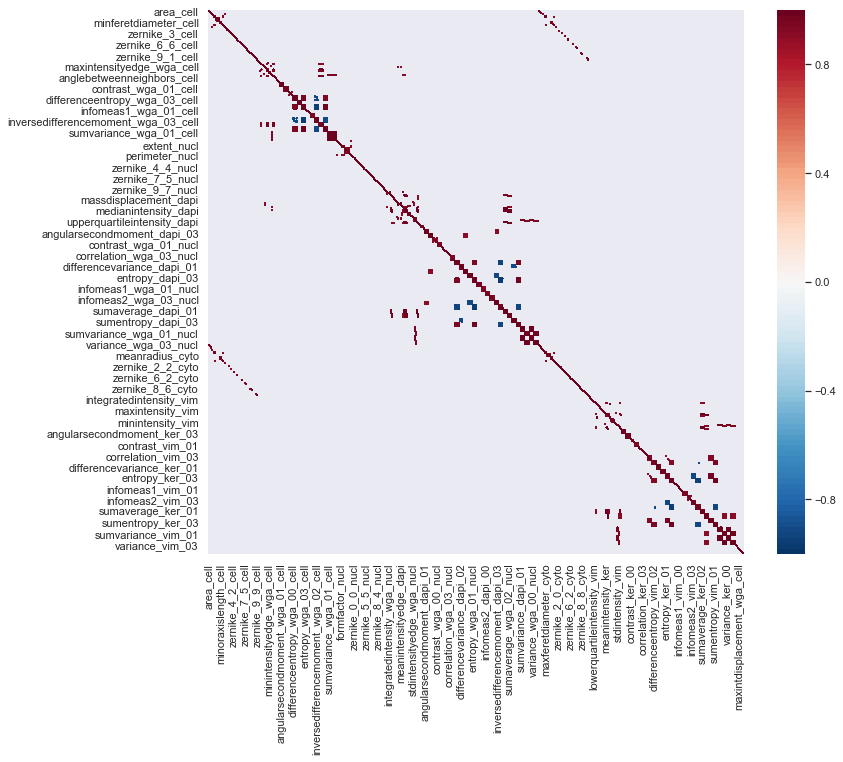

In [18]:
plot_corr(df, annot=False)

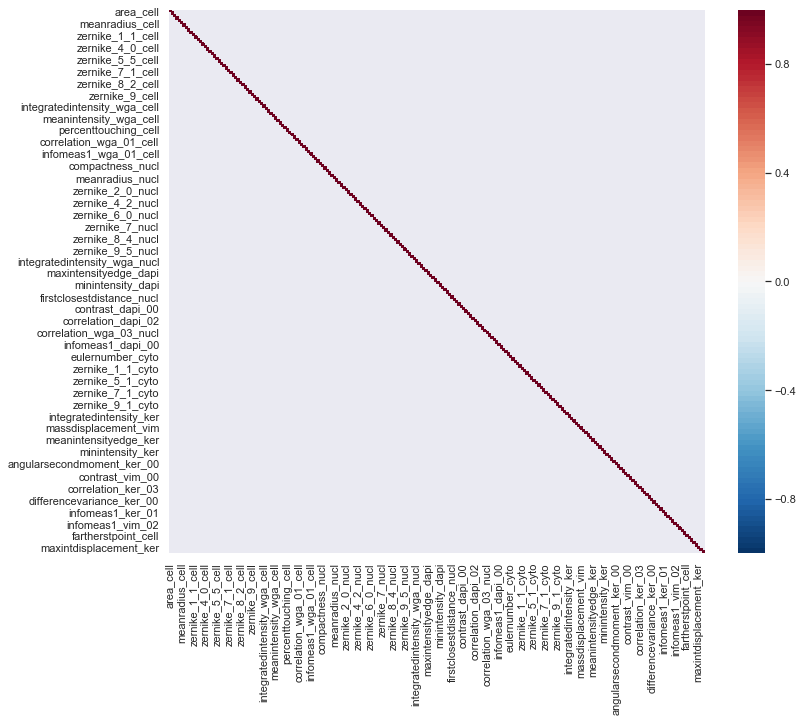

In [19]:
plot_corr(df[cols], annot=False)